# Twitter Sentiment Analysis
Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as positive, negative or neutral.

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

Dataset is provided by Analytics Vidhya

In [1]:
#Importing the libraries
import re      #for regular expressions or regex
import nltk    #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

In [2]:
train=pd.read_csv('C:/Users/Ritika/Desktop/covid19_datasets/twitter sentiment analysis/train_tweets.csv')
test=pd.read_csv('C:/Users/Ritika/Desktop/covid19_datasets/twitter sentiment analysis/test_tweets.csv')

## Data Inspection
Text is a highly unstructured form of data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. We will divide it into 2 parts:

    1.Data Inspection
    2.Data Cleaning

In [ ]:
#checking non racist/sexist tweets
train[train['label']==0].head(10)

In [4]:
#checking racist/sexist tweets
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [5]:
#dimensions of train and test data
train.shape,test.shape

((31962, 3), (17197, 2))

In [6]:
#label distribution in train dataset
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

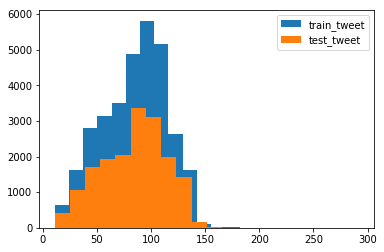

In [7]:
#checking the distribution of length of tweets,in terms of words,in both train and test data
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train_tweet')
plt.hist(length_test,bins=20,label='test_tweet')
plt.legend()
plt.show()

## Data Cleaning
In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

In [8]:
#Combine train and test data.
#Combining the datasets will make it convient to preprocess the data.
#Later we will split them back
combine=train.append(test,ignore_index=True)
combine.shape

C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [9]:
#remove unwanted text patterns from tweets
def remove_pattern(input_text,patterns):
    r=re.findall(patterns,input_text)
    for i in r:
        input_text=re.sub(i,'',input_text)
    return input_text

In [97]:
#Removing Twitter Handles (@user)
#We will remove the twitter handles as they are already masked as @user due to privacy concerns. 
#These twitter handles hardly give any information about the nature of the tweet.
combine['tidy_tweet']=np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [11]:
#Removing Punctuations, Numbers, and Special Characters
#since they wouldn’t help in differentiating different types of tweets.
combine['tidy_tweet']=combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [12]:
#Removing Short Words
#smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’.
combine['tidy_tweet']=combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


In [13]:
#Text Normalization
#reducing the total number of unique words in our data without losing a significant amount of information.
tokenized_tweet=combine['tidy_tweet'].apply(lambda x:x.split()) #tokenizing
#tokenization is the process of splitting a string of text into tokens.
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [14]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #stemming

In [15]:
#Stitch these tokens back together
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combine['tidy_tweet']=tokenized_tweet

## Story Generation and Visualization from Tweets
Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. 

In [16]:
!pip install wordcloud  #installing wordcloud module

Invalid requirement: '#installing'
Traceback (most recent call last):
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\Ritika\AppData\Local\Cont

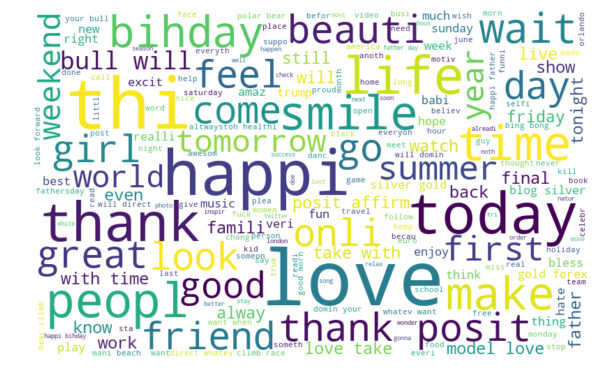

In [17]:
#Understanding the common words used in the tweets: WordCloud
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent 
#words appear in smaller sizes.
all_words=' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color='white').generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

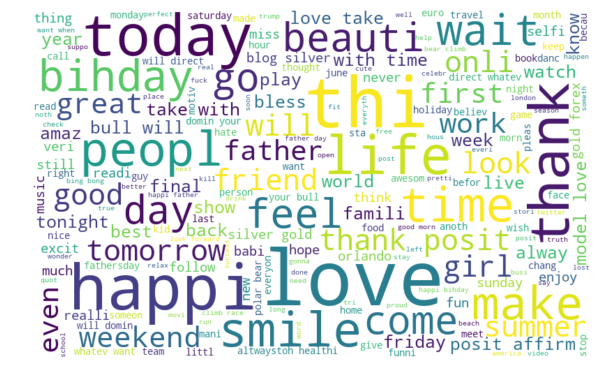

In [18]:
#Words in non racist/sexist tweets
normal_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==0]]) 
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color='white').generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

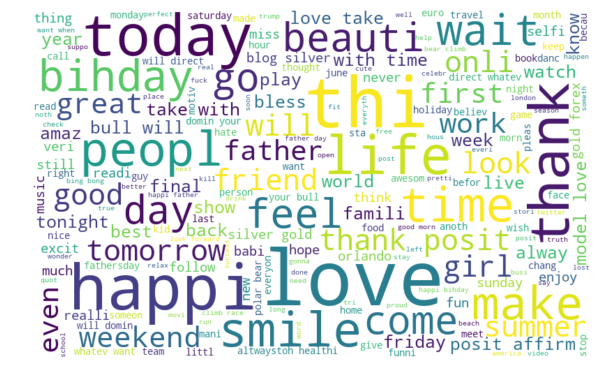

In [19]:
#Racist/Sexist Tweets
negative_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==1]]) 
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color='white').generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
#Understanding the impact of Hashtags on tweets sentiment
#function to collect hashtags
def hashtags_extract(x):
    hashtags=[]
    #Loop over the words in the tweets
    for i in x:
        ht=re.findall(r'#(\w)+',i)
        hashtags.append(ht)
    return hashtags

In [21]:
#extracting hashtags from non racist/sexual tweets
ht_positive=hashtags_extract(combine['tidy_tweet'][combine['label']==0])

In [22]:
#extracting hashtags from racist/sexual tweets
ht_negative=hashtags_extract(combine['tidy_tweet'][combine['label']==1])

In [23]:
#unnesting list
ht_positive=sum(ht_positive,[])

In [24]:
ht_negative=sum(ht_negative,[])

In [25]:
#Non-Racist/Sexist Tweets
a=nltk.FreqDist(ht_positive)
df=pd.DataFrame({'Hashtags' : list(a.keys()), 'Count' : list(a.values())})

In [26]:
#Selecting top 20 most frequent hashtags
df=df.nlargest(columns='Count',n=20)

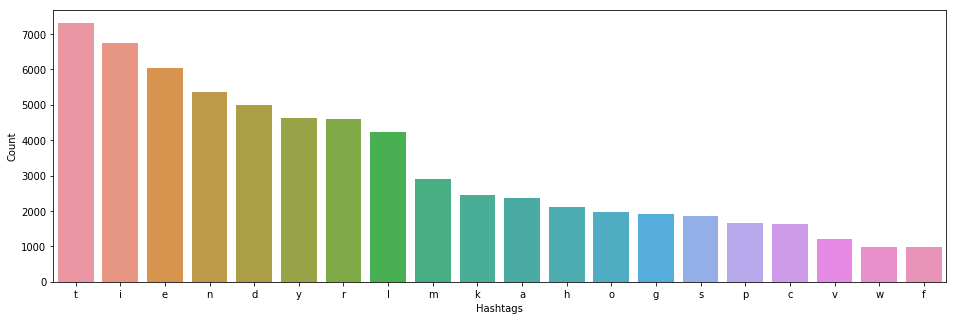

In [27]:
plt.figure(figsize=(16,5))
ax=sns.barplot(data=df, x='Hashtags', y='Count')
ax.set(ylabel='Count')
plt.show()

In [28]:
#Racist/Sexist Tweets
b=nltk.FreqDist(ht_negative)
ef=pd.DataFrame({'Hashtags' : list(b.keys()), 'Count' : list(b.values())})

In [29]:
ef=ef.nlargest(columns='Count',n=20)

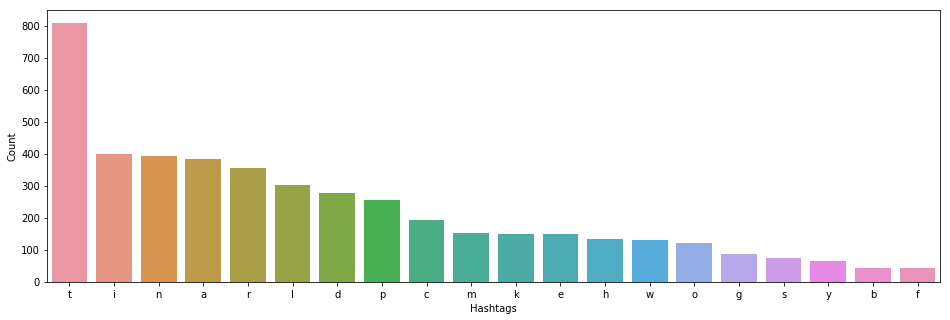

In [30]:
plt.figure(figsize=(16,5))
ax=sns.barplot(data=ef, x='Hashtags', y='Count')
ax.set(ylabel='Count')
plt.show()

In [31]:
!pip install gensim    #installing gensim module

Invalid requirement: '#installing'
Traceback (most recent call last):
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\Ritika\AppData\Local\Cont

## Bag-of-Words Features
To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

In [32]:
#Bag-of-Words Features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
bow_vectorizer=CountVectorizer(max_df=0.90, min_df=2 , max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(combine['tidy_tweet'])
bow.shape

(49159, 1000)

## TF-IDF features
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

In [33]:
#TF-IDF features
#TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare 
#in the entire corpus but appear in good numbers in few documents.
tfidf_vectorizer=TfidfVectorizer(max_df=0.90, min_df=2 , max_features=1000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
tfidf.shape

(49159, 1000)

## Word2Vec Features
Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing. 

The advantages of using word embeddings over BOW or TF-IDF are:

    1.Dimensionality reduction - significant reduction in the no. of features required to build a model.
    2.It capture meanings of the words, semantic relationships and the different types of contexts they are used in.


In [34]:
#Word2Vec method
tokenized_tweet=combine['tidy_tweet'].apply(lambda x : x.split())   #tokenizing
models_w2v=gensim.models.Word2Vec(tokenized_tweet,
                                 size=200, #desired no. of features/independent variables
                                 window=5, #context windows size
                                 min_count=2,
                                 sg=1, #1 for skip-gram model
                                 hs=0,
                                 negative=10, #for negative sampling
                                 workers=2, #no. of cores
                                 seed=34)
models_w2v.train(tokenized_tweet,total_examples=len(combine['tidy_tweet']),epochs=20)

(6510028, 7536020)

In [35]:
#examples-we can see that our word2vec model does a good job of finding the most similar words for a given word.
#That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most 
#similar vectors (words).
models_w2v.wv.most_similar(positive='dinner')

[('#avocado', 0.5565481185913086),
 ('melani', 0.5531904697418213),
 ('cookout', 0.551265299320221),
 ('spaghetti', 0.5475195646286011),
 ('#cellar', 0.5360075235366821),
 ('#biall', 0.5358869433403015),
 ('#foodcoma', 0.5353236198425293),
 ('fav', 0.5352153778076172),
 ('spinach', 0.5318190455436707),
 ('#bihdaydinn', 0.5309011340141296)]

In [36]:
models_w2v.wv.most_similar(positive="trump")

[('hillari', 0.5475369095802307),
 ('phoni', 0.5416063070297241),
 ('unstabl', 0.5382857322692871),
 ('#delegaterevolt', 0.5368064641952515),
 ('melo', 0.5321460962295532),
 ('donald', 0.5268702507019043),
 ('unfavor', 0.5244017243385315),
 ('nomine', 0.5192891359329224),
 ('tomlin', 0.5179340243339539),
 ('potu', 0.5154825448989868)]

In [37]:
#Vector representation of any word from our corpus
models_w2v['food']

array([ 0.00298955, -0.12453601,  0.6576632 ,  0.34358788, -0.04016358,
       -0.19552656, -0.8629135 , -0.05604402, -0.97165304, -0.39803943,
        0.1391296 ,  0.42350692,  0.3161849 , -0.33689708,  1.5238559 ,
       -0.19748425,  0.62455493,  0.54389256,  0.10732271,  0.14699946,
        0.5794975 , -0.30455428,  0.6183894 , -0.09091583, -0.03373862,
       -1.0674716 , -0.5207051 , -0.23897646, -0.10396119, -0.64865255,
        0.22416912, -0.15520519,  0.18575695, -0.06057449,  0.1490219 ,
        0.24366847,  0.20464514,  0.17062692,  0.06161676,  0.11516181,
        0.28356773,  0.4588749 , -0.39728042,  0.4587085 , -0.39084962,
        0.06622568,  0.02562076, -0.7773992 , -0.60715777, -0.72871023,
        0.2039181 ,  0.1845698 ,  0.15368062, -0.23408182, -0.34196836,
        0.5159625 , -0.06930877, -0.24384189,  0.17787075,  0.09302804,
       -0.035134  ,  0.41848886, -0.24317588, -0.13723753, -0.46205986,
       -0.3590837 , -0.5063926 , -0.19948797, -0.9076261 ,  0.61

In [38]:
len(models_w2v['food'])

200

## Preparing Vectors for Tweets
Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [39]:
#Preparing vectors for tweets 
#function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=models_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue #handling the case where the token is not in the vocabulary
    if count!=0:
        vec/=count
    return vec

In [40]:
#Preparing word2vec feature set
wordvec_array=np.zeros((len(tokenized_tweet),200))
for i in range (len(tokenized_tweet)):
    wordvec_array[i,:]=word_vector(tokenized_tweet[i],200)
    wordvec_df=pd.DataFrame(wordvec_array)
wordvec_df.shape

(49159, 200)

## Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

In [41]:
#Doc2Vec Embedding
#Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents.
from tqdm import tqdm 
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence

In [42]:
#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs.
def add_label(twt):
    output=[]
    for i,s in zip(twt.index,twt):
        output.append(LabeledSentence(s,['tweet_'+str(i)]))
    return output 
labeled_tweets=add_label(tokenized_tweet)   #label all tweets
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [43]:
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(
    dm=1, # dm = 1 for ‘distributed memory’ model                                   
    dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
    size=200, # no. of desired features                                  
    window=5, # width of the context window                                  
    negative=7, # if > 0 then negative sampling will be used                                 
    min_count=5, # Ignores all words with total frequency lower than 2.                                  
    workers=3, # no. of cores                                  
    alpha=0.1, # learning rate                                  
    seed = 23) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combine['tidy_tweet']), epochs=15)

C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 1895665.92it/s]


In [44]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combine)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

## Modelling

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

    1.Logistic Regression
    2.Support Vector Machine
    3.RandomForest
    4.XGBoost


## Logistic Regression

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### Bag of Words Features

In [48]:
#Extracting train and test BoW features
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
#Splitting data into training and validation set
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)
lreg=LogisticRegression()
#training the model
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.predict_proba(xvalid_bow) #predicting on the validation set
prediction_int = prediction[:,1] >= 0.3   #if prediction is >0.3 then 1 else 0
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)   #Calculating f1_score for validation set

0.5307820299500832

In [50]:
#Prediction for test dataset and creating a submission file
test_pred=lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3   #if prediction is >0.3 then 1 else 0
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False) #writing data to a csv file

### TF-IDF Features
Same steps are followed as above

In [52]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]
#training the model
lreg.fit(xtrain_tfidf,ytrain)
prediction=lreg.predict_proba(xvalid_tfidf) #predicting on the validation set
prediction_int = prediction[:,1] >= 0.3   #if prediction is >0.3 then 1 else 0
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5446507515473032

### Word2Vec Features

In [53]:
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
xtrain_w2v=train_w2v.iloc[ytrain.index,:]
xvalid_w2v=train_w2v.iloc[yvalid.index,:]
#training the model
lreg.fit(xtrain_w2v,ytrain)
prediction=lreg.predict_proba(xvalid_w2v) #predicting on the validation set
prediction_int = prediction[:,1] >= 0.3   #if prediction is >0.3 then 1 else 0
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.6186943620178041

### Doc2Vec Features

In [54]:
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
xtrain_d2v=train_d2v.iloc[ytrain.index,:]
xvalid_d2v=train_d2v.iloc[yvalid.index,:]
#training the model
lreg.fit(xtrain_d2v,ytrain)
prediction=lreg.predict_proba(xvalid_d2v) #predicting on the validation set
prediction_int = prediction[:,1] >= 0.3   #if prediction is >0.3 then 1 else 0
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.37533039647577093

## Support Vector Machine(SVM)
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes

In [55]:
from sklearn import svm

### Bag-of-Words Features

In [57]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5088536812674744

In [58]:
#Again let’s make predictions for the test dataset and create another submission file
test_pred=svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3  
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_svm_bow.csv',index=False)

### TF-IDF Features

In [59]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5100182149362478

### Word2Vec Features

In [60]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6116352201257862

### Doc2Vec Features

In [61]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.20209059233449475

## Random Forest
Random Forest is a versatile machine learning algorithm capable of performing both regression and classification tasks. It is a kind of ensemble learning method, where a few weak models combine to form a powerful model.

In [62]:
from sklearn.ensemble import RandomForestClassifier

### Bag-of-Words Features

In [86]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction=rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5529225908372828

In [87]:
#Prediction for test dataset
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)

### TF-IDF Features

In [88]:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_tfidf,ytrain)
prediction=rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.562152133580705

### Word2Vec Features

In [89]:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_w2v,ytrain)
prediction=rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5074946466809421

### Doc2Vec Features

In [90]:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_d2v,ytrain)
prediction=rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.0594059405940594

## XGBoost
Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. 

In [72]:
!pip install xgboost

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.17 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [73]:
from xgboost import XGBClassifier

### Bag-of-Words Features

In [81]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5247706422018349

In [82]:
test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

### TF-IDF Features

In [83]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5394265232974911

### Word2Vec Features

In [85]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6701754385964912

XGBoost model on word2vec features has outperformed all the previuos models in this project.

### Doc2Vec Features

In [91]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.3512304250559284